Estimated Probability: 0.13518
Actual Probability: 0.13534
Error: -0.11474%


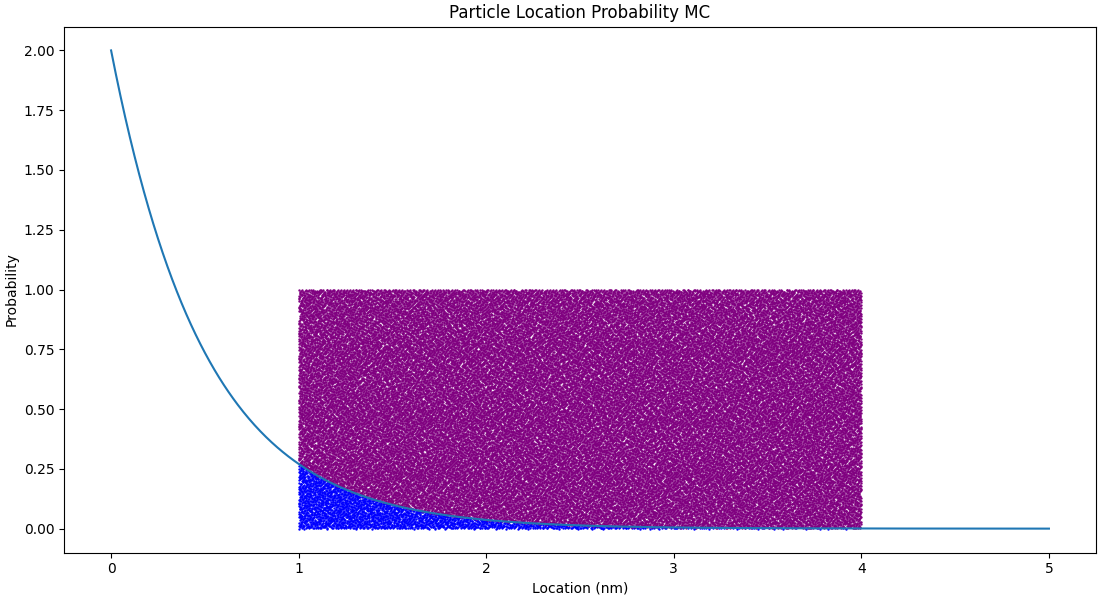

In [10]:
"""particle_location.ipynb"""
# Cell 1 (MC Estimation)

from __future__ import annotations
import typing
import numpy as np
from numba import float64, vectorize
from scipy.integrate import quad
import matplotlib.pyplot as plt
if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

iterations: int = 50_000
c: float = np.sqrt(2)

def pdf(x: float) -> float:
    return 2 * np.exp(-2 * x)
    
# Copied from mc_circle_qrng.ipynb
@vectorize([float64(float64, float64)], nopython=True)  # type: ignore
def halton(n: float, p: int) -> float:
    h = 0
    f = 1
    while n > 0:
        f: float = f / p
        h += (n % p) * f
        n = int(n / p)
    return h

def plot(ax: Axes) -> None:
    x: NDArray[np.float_] = halton(np.arange(iterations), 2) * 3 + 1
    y: NDArray[np.float_] = halton(np.arange(iterations), 3)

    f: NDArray[np.float_] = pdf(x)

    x_under: NDArray[np.float_] = x[y <= f]
    y_under: NDArray[np.float_] = y[y <= f]
    x_over: NDArray[np.float_] = x[y > f]
    y_over: NDArray[np.float_] = y[y > f]

    pixel_size: float = (72 / ax.figure.dpi) ** 2

    ax.scatter(x_under, y_under, color="blue", s=pixel_size)
    ax.scatter(x_over, y_over, color="purple", s=pixel_size)

    x_true: NDArray[np.float_] = np.linspace(0, 5, 1000)
    y_true: NDArray[np.float_] = pdf(x_true)
    ax.plot(x_true, y_true)

    est_area: float = np.count_nonzero(y <= f) / iterations * 3
    act_area: float = quad(pdf, 1, np.inf)[0]
    error: float = (est_area - act_area) / act_area

    ax.set_title("Particle Location Probability MC")
    ax.set_xlabel("Location (nm)")
    ax.set_ylabel("Probability")

    print(f"Estimated Probability: {est_area:.5}")
    print(f"Actual Probability: {act_area:.5}")
    print(f"Error: {error * 100:.5}%")

plt.close("all")
plt.figure(" ", figsize=(11, 6), constrained_layout=True)
plot(plt.axes())
plt.show()
    

In [11]:
# Cell 2 (Numerical Estimation)

prob: float = quad(pdf, 1, np.inf)[0]

print(f"Probability: {prob * 100:.5}%")

Probability: 13.534%
